In [2]:
#%matplotlib notebook
%matplotlib inline
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, sys
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
# BASELINE
# TFIDF
# SICK_VERBADJNOUN_lemma	0.611	0.091		# TFIDF
# SICK_ADJNOUN_lemma	0.558	0.111			# TFIDF
# SICK_VERBADJNOUN_orth	0.568	0.106		# TFIDF
# SICK_ADJNOUN_orth	0.542	0.119			# TFIDF

In [4]:
sick_test = pd.DataFrame.from_csv('SA_results/SICK_test_annotated.txt', sep='\t', header=0)
sick_test_overlap = pd.DataFrame.from_csv('SA_results/semeval_overlap_test.tsv', sep='\t', header=0)
print(sick_test['relatedness_score'].corr(sick_test_overlap['relatedness_score']))
sick_test = sick_test.reset_index()
#0.62701073200106172

0.627010732001


In [5]:
#pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_rows', 1000)

results_all = pd.DataFrame.from_csv('SA_results/scores_all_new.tsv', sep='\t', index_col=['crossfold_id','dev_file_index'])
results_all['dependency available'] = results_all.apply(lambda row: 'NO' if 'blanked' in row.train_data_path else 'YES', axis=1)
results_all['order aware'] = results_all.apply(lambda row: 'YES' if 'LSTM' in row.tree_embedder else 'NO', axis=1)
#results_all = results_all.set_index(['dependency available', 'order aware'])
results_all['pearson_tfidf'] = 0.618864
results_all['mse_tfidf'] = 0.082341
#results_all.set_index(['crossfold_id','dev_file_index'])
results_all#[:10]

clipping      optimizer  lexicon_trainable  \
crossfold_id dev_file_index                                               
0            0                      5  AdamOptimizer              False   
             0                      5  AdamOptimizer              False   
             0                      5  AdamOptimizer              False   
             0                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             2                      5  AdamOptimizer              False   
             2                      5  AdamOptimizer              False   
             2                      5  AdamOptimizer              False   
             2                      5  AdamOptimizer              False   
             3                      5  AdamOptimizer              False   
             3                      5  AdamOptimizer              False   
             3                      5  AdamOptimizer              False   
             3                      5  AdamOptimizer              False   
             4                      5  AdamOptimizer              False   
             4                      5  AdamOptimizer              False   
             4                      5  AdamOptimizer              False   
             4                      5  AdamOptimizer              False   
1            0                      5  AdamOptimizer              False   
             0                      5  AdamOptimizer              False   
             0                      5  AdamOptimizer              False   
             0                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             2                      5  AdamOptimizer              False   
             2                      5  AdamOptimizer              False   
...                               ...            ...                ...   
8            2                      5  AdamOptimizer              False   
             3                      5  AdamOptimizer              False   
             3                      5  AdamOptimizer              False   
             3                      5  AdamOptimizer              False   
             3                      5  AdamOptimizer              False   
             4                      5  AdamOptimizer              False   
             4                      5  AdamOptimizer              False   
             4                      5  AdamOptimizer              False   
             4                      5  AdamOptimizer              False   
9            0                      5  AdamOptimizer              False   
             0                      5  AdamOptimizer              False   
             0                      5  AdamOptimizer              False   
             0                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             1                      5  AdamOptimizer              False   
             2                      5  AdamOptimizer              False   
             2                      5  AdamOptimizer              False   
             2                      5  AdamOptimizer              False   
             2                      5  AdamOptimizer  

In [6]:
res = results_all[['dependency available', 'order aware', 'score_pearson', 'score_mse', 'pearson_tfidf', 'mse_tfidf']].set_index(['dependency available', 'order aware']).rename(columns={'score_pearson': 'pearson', 'score_mse':'mse'})
res

,,pearson,mse,pearson_tfidf,mse_tfidf
dependency available,order aware,,,,
NO,NO,0.839656,0.028558,0.618864,0.082341
YES,NO,0.842555,0.026927,0.618864,0.082341
NO,YES,0.837874,0.020711,0.618864,0.082341
YES,YES,0.839254,0.020170,0.618864,0.082341
NO,NO,0.835462,0.029643,0.618864,0.082341
YES,NO,0.838937,0.027700,0.618864,0.082341
NO,YES,0.833905,0.021339,0.618864,0.082341
YES,YES,0.839310,0.020403,0.618864,0.082341
NO,NO,0.839617,0.027691,0.618864,0.082341


In [7]:
# get subsets
#res.xs('NO', level='dependency available')
#res.xs('NO', level='order aware')
s = res.xs(('NO', 'NO'), level=['order aware', 'dependency available'])
#pd.Series(s['pearson'])

In [8]:
import subprocess
def print_images(images, path="SA_results/images"):
    for name in images:
        p = os.path.join(path, name)
        # save figure as svg
        images[name].savefig('%s.svg' % p)
        # convert for latex
        subprocess.call(['inkscape','-D','-z','--file=%s.svg' % p, '--export-pdf=%s.pdf' % p, '--export-latex'])
        print('finished %s' % p)

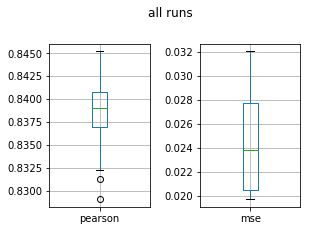

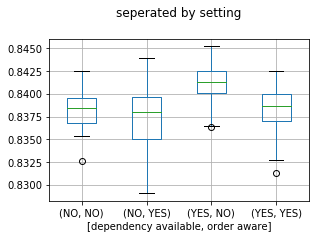

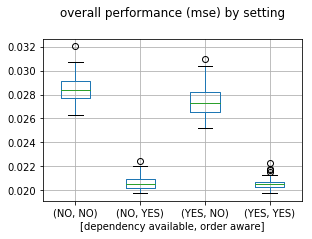

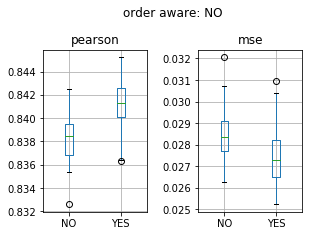

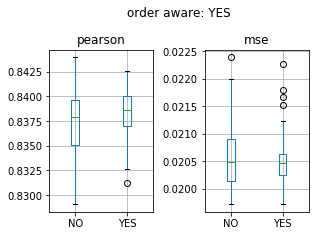

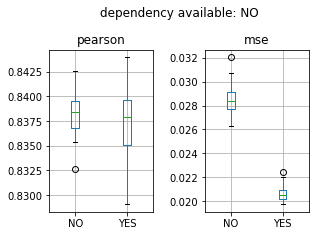

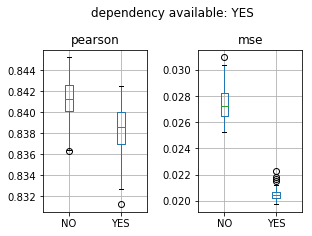

In [9]:
from matplotlib import rcParams

#rcParams['axes.titlepad'] = 20 
#rcParams['axes.titlepad'] = 20 
images = {}
bootstrap=10000

figsize = (4.5, 3)
fig_merged, axs = plt.subplots(1,2, figsize=figsize)
res.boxplot(column=['pearson'], figsize=(figsize[0] / 2, figsize[1]), ax=axs[0], bootstrap=bootstrap)
#axs[0].minorticks_on()
#axs[0].grid(which='minor', linestyle=':', linewidth='0.3', color='black')
res.boxplot(column=['mse'], figsize=(figsize[0] / 2, figsize[1]), ax=axs[1], bootstrap=bootstrap)
#axs[1].minorticks_on()
#axs[1].grid(which='minor', linestyle=':', linewidth='0.3', color='black')
fig_merged.suptitle('all runs', y=1.05)
plt.subplots_adjust(wspace=0.5)
images['fig_merged'] = fig_merged

y_title = 1.0
y_suptitle = 1.1

axs = res.boxplot(column=['pearson'], by=['dependency available', 'order aware'], figsize=figsize, bootstrap=bootstrap)
#axs.minorticks_on()
#axs.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.title('seperated by setting', y=y_suptitle)
fig_sep_pearson = axs.get_figure()
fig_sep_pearson.suptitle('')
images['fig_sep_pearson'] = fig_sep_pearson

axs = res.boxplot(column=['mse'], by=['dependency available', 'order aware'], figsize=figsize, bootstrap=bootstrap)
#axs.minorticks_on()
#axs.grid(which='minor', linestyle=':', linewidth='0.3', color='black')
plt.title('overall performance (mse) by setting', y=y_suptitle)
fig_sep_mse = axs.get_figure()
fig_sep_mse.suptitle('')
images['fig_sep_mse'] = fig_sep_mse

fig_sep_dep_orderno, axs_sep_dep = plt.subplots(1,2, figsize=figsize)
res.xs('NO', level='order aware').boxplot(column=['pearson'], by=['dependency available'], ax=axs_sep_dep[0], bootstrap=bootstrap)
axs_sep_dep[0].set_title('pearson', y=y_title)
axs_sep_dep[0].set_xlabel('')
res.xs('NO', level='order aware').boxplot(column=['mse'], by=['dependency available'], ax=axs_sep_dep[1], bootstrap=bootstrap)
axs_sep_dep[1].set_title('mse', y=y_title)
axs_sep_dep[1].set_xlabel('')
fig_sep_dep_orderno.suptitle('order aware: NO', y=y_suptitle)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.subplots_adjust(wspace=0.5)
images['fig_sep_dep_orderno'] = fig_sep_dep_orderno

fig_sep_dep_orderyes, axs_sep_dep = plt.subplots(1,2, figsize=figsize)
res.xs('YES', level='order aware').boxplot(column=['pearson'], by=['dependency available'], ax=axs_sep_dep[0], bootstrap=bootstrap)
axs_sep_dep[0].set_title('pearson', y=y_title)
axs_sep_dep[0].set_xlabel('')
res.xs('YES', level='order aware').boxplot(column=['mse'], by=['dependency available'], ax=axs_sep_dep[1], bootstrap=bootstrap)
axs_sep_dep[1].set_title('mse', y=y_title)
axs_sep_dep[1].set_xlabel('')
fig_sep_dep_orderyes.suptitle('order aware: YES', y=y_suptitle)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.subplots_adjust(wspace=0.5)
images['fig_sep_dep_orderyes'] = fig_sep_dep_orderyes

fig_sep_order_depno, axs_sep_order = plt.subplots(1,2, figsize=figsize)
res.xs('NO', level='dependency available').boxplot(column=['pearson'], by=['order aware'], ax=axs_sep_order[0], bootstrap=bootstrap)
axs_sep_order[0].set_title('pearson', y=y_title)
axs_sep_order[0].set_xlabel('')
res.xs('NO', level='dependency available').boxplot(column=['mse'], by=['order aware'], ax=axs_sep_order[1], bootstrap=bootstrap)
axs_sep_order[1].set_title('mse', y=y_title)
axs_sep_order[1].set_xlabel('')
fig_sep_order_depno.suptitle('dependency available: NO', y=y_suptitle)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.subplots_adjust(wspace=0.5)
images['fig_sep_order_depno'] = fig_sep_order_depno

fig_sep_order_depyes, axs_sep_order = plt.subplots(1,2, figsize=figsize)
res.xs('YES', level='dependency available').boxplot(column=['pearson'], by=['order aware'], ax=axs_sep_order[0], bootstrap=bootstrap)
axs_sep_order[0].set_title('pearson', y=y_title)
axs_sep_order[0].set_xlabel('')
res.xs('YES', level='dependency available').boxplot(column=['mse'], by=['order aware'], ax=axs_sep_order[1], bootstrap=bootstrap)
axs_sep_order[1].set_title('mse', y=y_title)
axs_sep_order[1].set_xlabel('')
fig_sep_order_depyes.suptitle('dependency available: YES', y=y_suptitle)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)
plt.subplots_adjust(wspace=0.5)
images['fig_sep_order_depyes'] = fig_sep_order_depyes




In [10]:
print_images(images)

finished SA_results/images/fig_sep_dep_orderno
finished SA_results/images/fig_sep_order_depyes
finished SA_results/images/fig_sep_mse
finished SA_results/images/fig_sep_pearson
finished SA_results/images/fig_merged
finished SA_results/images/fig_sep_order_depno
finished SA_results/images/fig_sep_dep_orderyes


In [11]:
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from math import sqrt
import scipy.stats as st

def bootstrap_convidence(values, n_iterations=1000, alpha=0.95):
    #values = res.xs(('NO', 'NO'))['pearson']
    mean_b = np.mean(values)
    std_b = np.std(values)
    n_b_root = sqrt(len(values))
    # configure bootstrap
    #n_iterations = 10000
    n_size = int(len(values) * 0.10)
    # run bootstrap
    stats = list()
    for i in range(n_iterations):
        samples = resample(values, n_samples=n_size)
        t_i = (np.mean(samples) - mean_b) * n_b_root / np.std(samples)
        stats.append(t_i)
    # plot scores
    #pyplot.hist(stats)
    #pyplot.show()
    
    # confidence intervals
    #print(stats)
    #p_lower = ((1.0-alpha)/2.0) * 100
    p_lower = (alpha/2.) * 100
    #p = (alpha / 2.0) * 100
    lower = numpy.percentile(stats, p_lower)
    #lower = st.t._ppf(p_lower, n_iterations-1)
    #print('lower %.2f: %.3f' % (p_lower, lower))
    #p_upper = (alpha+((1.0-alpha)/2.0)) * 100
    p_upper = (1.-alpha/2.) * 100
    #p = (1.0 - alpha / 2.0) * 100
    upper = numpy.percentile(stats, p_upper)
    #upper = st.t._ppf(p_upper, n_iterations-1)
    #print('upper %.1f: %.3f' % (p_upper, upper))
    c_intv = [mean_b + lower * std_b / n_b_root, mean_b + upper * std_b / n_b_root]
    return c_intv

#def mean_confidence(values, alpha=0.95):
#    return st.t.interval(alpha, len(values)-1, loc=np.mean(values), scale=st.sem(values))

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), st.sem(a)
    h = se * st.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h


alpha = 0.5
for measure in ['pearson', 'mse']:
    print('confidence intervalls for %s (order aware, dependency available):' % measure)
    values = res[measure]
    conf_simple = mean_confidence_interval(values, confidence=1-alpha)
    print('%-15s %.1f%% confidence interval: %.4f and %.4f (%.4f) %s naive' % ('ALL', 100 - alpha*100, conf_simple[1],conf_simple[2], conf_simple[2] - conf_simple[1], conf_simple[1] <= conf_simple[0] <= conf_simple[2]))
    c_boot = bootstrap_convidence(values, alpha=alpha)
    print('%-15s %.1f%% confidence interval: %.4f and %.4f (%.4f) %s' % ('ALL', 100 - alpha*100, c_boot[0],c_boot[1], c_boot[1] - c_boot[0], c_boot[0] <= conf_simple[0] <= c_boot[1]))
    for setting in [('NO', 'NO'), ('NO', 'YES'), ('YES', 'NO'), ('YES', 'YES')]:
        values = res.xs(setting)[measure]
        conf_simple = mean_confidence_interval(values, confidence=1-alpha)
        print('%-15s %.1f%% confidence interval: %.4f and %.4f (%.4f) %s naive' % (str(setting), 100 - alpha*100, conf_simple[1],conf_simple[2], conf_simple[2] - conf_simple[1], conf_simple[1] <= conf_simple[0] <= conf_simple[2]))
        c_boot = bootstrap_convidence(values=values, alpha=alpha)
        print('%-15s %.1f%% confidence interval: %.4f and %.4f (%.4f) %s' % (str(setting), 100 - alpha*100, c_boot[0],c_boot[1], c_boot[1] - c_boot[0], c_boot[0] <= conf_simple[0] <= c_boot[1]))
print('finished')  
#print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

confidence intervalls for pearson (order aware, dependency available):
ALL             50.0% confidence interval: 0.8387 and 0.8390 (0.0003) True naive
ALL             50.0% confidence interval: 0.8384 and 0.8393 (0.0009) True
('NO', 'NO')    50.0% confidence interval: 0.8380 and 0.8384 (0.0004) True naive


/home/arne/miniconda2/lib/python2.7/site-packages/ipykernel/ipkernel.py:196: PerformanceWarning: indexing past lexsort depth may impact performance.
  res = shell.run_cell(code, store_history=store_history, silent=silent)


('NO', 'NO')    50.0% confidence interval: 0.8375 and 0.8389 (0.0014) True
('NO', 'YES')   50.0% confidence interval: 0.8372 and 0.8378 (0.0006) True naive
('NO', 'YES')   50.0% confidence interval: 0.8365 and 0.8389 (0.0024) True
('YES', 'NO')   50.0% confidence interval: 0.8411 and 0.8415 (0.0004) True naive
('YES', 'NO')   50.0% confidence interval: 0.8406 and 0.8421 (0.0016) True
('YES', 'YES')  50.0% confidence interval: 0.8380 and 0.8385 (0.0005) True naive
('YES', 'YES')  50.0% confidence interval: 0.8375 and 0.8396 (0.0022) True
confidence intervalls for mse (order aware, dependency available):
ALL             50.0% confidence interval: 0.0241 and 0.0244 (0.0004) True naive
ALL             50.0% confidence interval: 0.0236 and 0.0248 (0.0012) True
('NO', 'NO')    50.0% confidence interval: 0.0283 and 0.0285 (0.0002) True naive
('NO', 'NO')    50.0% confidence interval: 0.0279 and 0.0288 (0.0009) True
('NO', 'YES')   50.0% confidence interval: 0.0205 and 0.0207 (0.0001) True nai

In [12]:
ex_values = np.array([110, 112, 106, 90, 96, 118, 108, 114, 107, 90, 85, 84, 113, 105, 90, 104])
print(ex_values.mean())
s = ex_values.std(ddof=1)
print(s*s)
alpha = 0.05
high_p = 1. - (alpha / 2.)
low_p = alpha / 2.
print(low_p)
print(high_p)
low = np.percentile(ex_values, low_p * 100)
high = np.percentile(ex_values, high_p * 100)
print(low)
print(high)

print(mean_confidence_interval(ex_values))

102.0
123.733333333
0.025
0.975
84.375
116.5
(102.0, 96.072679350832317, 107.92732064916768)


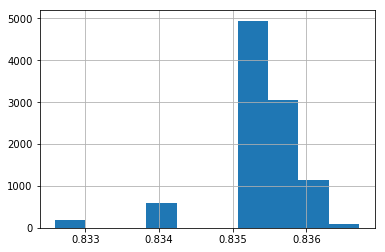

In [13]:
from sklearn.utils import resample
def bootstrap_5th_percentile(data, n_bootstraps):
    bootstraps = []
    for _ in xrange(n_bootstraps):
        # Sample with replacement from data
        samples = resample(data)
        # Then we take the fifth percentile!
        bootstraps.append(np.percentile(samples, len(data) * 0.1))
    return pd.Series(bootstraps)
values = res.xs(('NO', 'NO'))['pearson']
bootstraps = bootstrap_5th_percentile(values, 10000)
bootstraps.hist()

In [14]:
print('pearson       mean:  %f' % res[['pearson']].mean().values[0])
print('pearson        std:  %f' % res[['pearson']].std().values[0])
print('pearson_tfidf mean:  %f' % res[['pearson_tfidf']].mean().values[0])
print('mse           mean:  %f' % res[['mse']].mean().values[0])
print('mse            std:  %f' % res[['mse']].std().values[0])
print('mse_tfidf     mean:  %f' % res[['mse_tfidf']].mean().values[0])

res_grouped = {}
res_grouped[('dependency available', 'order aware')] = res.groupby(['dependency available', 'order aware'])
res_grouped['dependency available'] = res.groupby(['dependency available'])
res_grouped['order aware'] = res.groupby(['order aware'])
print(res_grouped[('dependency available', 'order aware')].mean())
print(res_grouped[('dependency available', 'order aware')].std())
print(res_grouped['dependency available'].std())
print(res_grouped['order aware'].std())


#res_grouped[('dependency available', 'order aware')][res_grouped[('dependency available', 'order aware')] == ('NO','NO')]

pearson       mean:  0.838813
pearson        std:  0.002867
pearson_tfidf mean:  0.618864
mse           mean:  0.024235
mse            std:  0.003824
mse_tfidf     mean:  0.082341
                                   pearson       mse  pearson_tfidf  mse_tfidf
dependency available order aware                                              
NO                   NO           0.838180  0.028394       0.618864   0.082341
                     YES          0.837504  0.020598       0.618864   0.082341
YES                  NO           0.841277  0.027425       0.618864   0.082341
                     YES          0.838292  0.020524       0.618864   0.082341
                                   pearson       mse  pearson_tfidf  mse_tfidf
dependency available order aware                                              
NO                   NO           0.001873  0.001189            0.0        0.0
                     YES          0.003102  0.000609            0.0        0.0
YES                  NO       

In [15]:
#res = results_all[['dependency available', 'order aware', 'score_pearson', 'score_mse', 'pearson_tfidf', 'mse_tfidf']]
res_ = {}
res_['pearson'] = results_all[['dependency available', 'order aware','score_pearson']]
res_['mse'] = results_all[['dependency available', 'order aware','score_mse']]
# all settings seperated
pivot = {}
pivot['pearson'] = pd.pivot_table(res_['pearson'], values='score_pearson', index=['crossfold_id', 'dev_file_index'], columns=['dependency available','order aware'])
pivot['mse'] = pd.pivot_table(res_['mse'], values='score_mse', index=['crossfold_id', 'dev_file_index'], columns=['dependency available','order aware'])
# spereated by order aware
pivot_merged = {'pearson':{}, 'mse':{}}
pivot_merged['pearson']['order aware'] = pd.pivot_table(res_['pearson'], values='score_pearson', index=['crossfold_id', 'dev_file_index', 'dependency available'], columns=['order aware'])
pivot_merged['mse']['order aware'] = pd.pivot_table(res_['mse'], values='score_mse', index=['crossfold_id', 'dev_file_index', 'dependency available'], columns=['order aware'])
# spereated by dependency available
#pivot_dep = {}
pivot_merged['pearson']['dependency available'] = pd.pivot_table(res_['pearson'], values='score_pearson', index=['crossfold_id', 'dev_file_index', 'order aware'], columns=['dependency available'])
pivot_merged['mse']['dependency available'] = pd.pivot_table(res_['mse'], values='score_mse', index=['crossfold_id', 'dev_file_index', 'order aware'], columns=['dependency available'])
#pivot['mse'] #['NO', 'NO'] - pivot_mse['NO', 'YES']
#pivot_['pearson']['dependency available']['NO']
pivot['mse']

dependency available               NO                 YES          
order aware                        NO       YES        NO       YES
crossfold_id dev_file_index                                        
0            0               0.028558  0.020711  0.026927  0.020170
             1               0.029643  0.021339  0.027700  0.020403
             2               0.027691  0.019871  0.030219  0.020779
             3               0.027694  0.020246  0.027740  0.021798
             4               0.027870  0.020566  0.026084  0.020635
1            0               0.027841  0.020444  0.026537  0.020806
             1               0.030558  0.021352  0.025562  0.020453
             2               0.027728  0.021157  0.028392  0.020184
             3               0.032059  0.019976  0.026071  0.020590
             4               0.027171  0.022389  0.025583  0.020395
2            0               0.029905  0.020919  0.025227  0.020402
             1               0.030706  0.020563  0.027085  0.020743
             2               0.028803  0.020177  0.028817  0.019718
             3               0.029151  0.020667  0.027908  0.020877
             4               0.026822  0.020654  0.026494  0.020628
3            0               0.027114  0.020611  0.026148  0.020563
             1               0.027314  0.020107  0.027315  0.021663
             2               0.028432  0.020826  0.030381  0.020281
             3               0.026740  0.020004  0.026888  0.019973
             4               0.027896  0.020161  0.025689  0.020125
4            0               0.029200  0.019902  0.027849  0.019984
             1               0.029206  0.019867  0.028119  0.020512
             2               0.028910  0.020431  0.026586  0.020593
             3               0.027725  0.020089  0.028886  0.020788
             4               0.030078  0.021078  0.026707  0.020187
5            0               0.028711  0.020194  0.028231  0.020228
             1               0.029396  0.020592  0.027869  0.020463
             2               0.028836  0.019836  0.027154  0.020203
             3               0.028152  0.020779  0.029675  0.020352
             4               0.027751  0.021251  0.025978  0.020727
6            0               0.028853  0.021880  0.030962  0.021515
             1               0.028504  0.021178  0.027562  0.020474
             2               0.027594  0.020140  0.027074  0.020611
             3               0.027891  0.020732  0.028686  0.020813
             4               0.026875  0.020120  0.026418  0.019966
7            0               0.028541  0.019849  0.026741  0.022256
             1               0.027169  0.021700  0.028914  0.020163
             2               0.028020  0.020205  0.026541  0.020541
             3               0.028515  0.020113  0.029294  0.020348
             4               0.027299  0.021987  0.027440  0.020283
8            0               0.029004  0.020966  0.028359  0.020468
             1               0.026843  0.020387  0.027447  0.020312
             2               0.027693  0.020482  0.026044  0.021220
             3               0.029804  0.020130  0.026740  0.020330
             4               0.026768  0.020459  0.026421  0.020324
9            0               0.026270  0.021485  0.027220  0.020527
             1               0.029453  0.020418  0.028653  0.019740
             2               0.028301  0.019710  0.028020  0.020561
             3               0.030108  0.020723  0.025321  0.020565
             4               0.028554  0.020486  0.027596  0.019951

In [16]:
temp = res_['mse'].reset_index().set_index(['dependency available', 'order aware'])
## get best dev_file_index (min score_mse) 
#temp['dev_file_index'].groupby('dev_file_index').min()

## get best score_mse per setting 
## ATTENTION: look up score_mse in full list to get crossfold_id! the crossfold_id displayed here is not the best one
temp[temp['dev_file_index'] == 2].groupby(['dependency available', 'order aware']).min()

crossfold_id  dev_file_index  score_mse
dependency available order aware                                         
NO                   NO                      0               2   0.027594
                     YES                     0               2   0.019710
YES                  NO                      0               2   0.026044
                     YES                     0               2   0.019718

In [17]:
from scipy import stats
settings = [('NO', 'NO'), ('NO', 'YES'), ('YES', 'NO'), ('YES', 'YES')]
for i, s1 in enumerate(settings):
    for s2 in settings[i+1:]:
        for measure in ['mse', 'pearson']:
            #%-15s %.1f
            #if s1 != s2:
            dif = pivot[measure][s2[0], s2[1]].mean() - pivot[measure][s1[0], s1[1]].mean()
            ttest = stats.ttest_ind(pivot[measure][s1[0], s1[1]], pivot[measure][s2[0], s2[1]], equal_var=False)
            print('%-14s vs %-14s %-10s: %10.4f   %.4f  %8.4f' % (str(s1), str(s2), measure, ttest[0], ttest[1], dif))

print()
measure = 'mse'
setting = 'dependency available'
dif = pivot_merged[measure][setting]['YES'].mean() - pivot_merged[measure][setting]['NO'].mean()
ttest = stats.ttest_ind(pivot_merged[measure][setting]['NO'], pivot_merged[measure][setting]['YES'], equal_var=False)
print('(merged) %-20s    %-10s  %10.4f   %.4f  %8.4f' % (setting, measure, ttest[0], ttest[1], dif))
merged = 'order aware'
dif = pivot_merged[measure][setting]['YES'].mean() - pivot_merged[measure][setting]['NO'].mean()
ttest = stats.ttest_ind(pivot_merged[measure][setting]['NO'], pivot_merged[measure][setting]['YES'], equal_var=False)
print('(merged) %-20s    %-10s  %10.4f   %.4f  %8.4f' % (setting, measure, ttest[0], ttest[1], dif))


# interesting results:
#('NO', 'NO')   vs ('NO', 'YES')  pearson   :     1.3194   0.1908
#('NO', 'NO')   vs ('YES', 'YES') pearson   :    -0.2459   0.8064
#('NO', 'YES')  vs ('NO', 'NO')   pearson   :    -1.3194   0.1908
#('NO', 'YES')  vs ('YES', 'YES') mse       :     0.6738   0.5021
#('NO', 'YES')  vs ('YES', 'YES') pearson   :    -1.3679   0.1745
#('YES', 'YES') vs ('NO', 'NO')   pearson   :     0.2459   0.8064
#('YES', 'YES') vs ('NO', 'YES')  mse       :    -0.6738   0.5021
#('YES', 'YES') vs ('NO', 'YES')  pearson   :     1.3679   0.1745

('NO', 'NO')   vs ('NO', 'YES')  mse       :    41.2657   0.0000   -0.0078
('NO', 'NO')   vs ('NO', 'YES')  pearson   :     1.3194   0.1908   -0.0007
('NO', 'NO')   vs ('YES', 'NO')  mse       :     3.8365   0.0002   -0.0010
('NO', 'NO')   vs ('YES', 'NO')  pearson   :    -7.6814   0.0000    0.0031
('NO', 'NO')   vs ('YES', 'YES') mse       :    43.3097   0.0000   -0.0079
('NO', 'NO')   vs ('YES', 'YES') pearson   :    -0.2459   0.8064    0.0001
('NO', 'YES')  vs ('YES', 'NO')  mse       :   -32.9444   0.0000    0.0068
('NO', 'YES')  vs ('YES', 'NO')  pearson   :    -7.0693   0.0000    0.0038
('NO', 'YES')  vs ('YES', 'YES') mse       :     0.6738   0.5021   -0.0001
('NO', 'YES')  vs ('YES', 'YES') pearson   :    -1.3679   0.1745    0.0008
('YES', 'NO')  vs ('YES', 'YES') mse       :    34.3888   0.0000   -0.0069
('YES', 'NO')  vs ('YES', 'YES') pearson   :     6.1891   0.0000   -0.0030
()
(merged) dependency available    mse             0.9645   0.3360   -0.0005
(merged) dependency av

In [17]:
#res_mse.hist(by='dependency available')
#plt.show
#res_mse.hist(by='order aware')
#plt.show
#res_pearson.hist(by='dependency available')
#plt.show
#res_pearson.hist(by='order aware')
#plt.show
#res_mse.hist()

In [18]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(pivot_merged['mse']['order aware'], alpha=0.7, figsize=(10, 10), diagonal='kde')

In [19]:
#scatter_matrix(pivot_pearson, alpha=0.7, figsize=(10, 10), diagonal='kde')

In [19]:
#'dependency available', 'order aware'
import os
paths = {}
settings = [('NO', 'NO'), ('NO', 'YES'), ('YES', 'NO'), ('YES', 'YES')]
settings = [str(s) for s in settings]
paths[settings[0]] = '/home/arne/ML_local/tf/supervised/log/SA/SICK_RUNS/BEST/AVG_2levels_blanked/6'
paths[settings[1]] = '/home/arne/ML_local/tf/supervised/log/SA/SICK_RUNS/BEST/LSTM_2levels_blanked/9'
paths[settings[2]] = '/home/arne/ML_local/tf/supervised/log/SA/SICK_RUNS/BEST/AVG_2levels/8'
paths[settings[3]] = '/home/arne/ML_local/tf/supervised/log/SA/SICK_RUNS/BEST/LSTM_2levels/2'
sims_predicted = {}
sims_gold_ = {}
errors_ = {}
sims_all = {}
for setting in settings:
    sims_predicted[setting] = np.load(os.path.join(paths[setting], 'sims.np'))
    sims_all[setting] = sims_predicted[setting]
    sims_gold_[setting] = np.load(os.path.join(paths[setting], 'sims_gold.np'))
    errors_[setting] =sims_predicted[setting]-sims_gold_[setting]
sims_gold = sims_gold_[settings[0]]
sims_predicted['sims_gold'] = sims_gold
sims_predicted = pd.DataFrame(sims_predicted)
sims_predicted

,"('NO', 'NO')","('NO', 'YES')","('YES', 'NO')","('YES', 'YES')",sims_gold
0,0.370564,0.414709,0.355933,0.419790,0.57500
1,0.725447,0.738850,0.731556,0.649033,0.67500
2,0.598656,0.462848,0.545540,0.433692,0.50000
3,0.960327,0.987081,0.964924,0.966371,0.97500
4,0.900868,0.810926,0.909717,0.865924,0.66625
5,0.671661,0.545044,0.627098,0.668202,0.57500
6,0.509854,0.602739,0.480061,0.483052,0.42500
7,0.659223,0.576433,0.617572,0.562165,0.47500
8,0.548275,0.475228,0.552428,0.523543,0.32500
9,0.983425,0.964340,0.983264,0.962290,0.97500


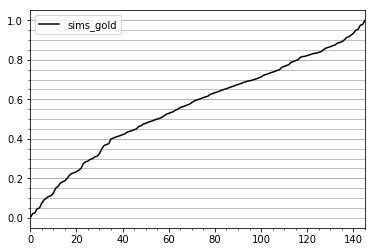

In [59]:
sims_gold_merged = sims_predicted.sort_values('sims_gold').groupby('sims_gold').mean().reset_index()[['sims_gold']]
plot_temp = sims_gold_merged.plot(color='k')
#plot_temp.get_yaxis().set_visible(True)
plot_temp.grid('on', which='major', axis='y' )
plot_temp.grid('on', which='minor', axis='y', linestyle='-')
#plot_temp.tick_params(axis='x',which='minor',bottom='off')
#plot_temp.tick_params(axis='y',which='minor',bottom='off')
plot_temp.minorticks_on()

finished SA_results/images/fig_predictions_bp


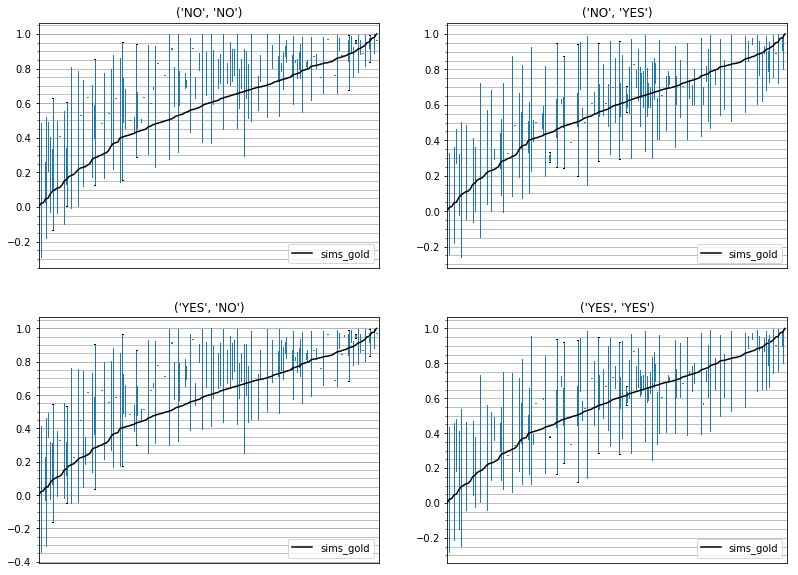

In [81]:
figsize = (13, 10)
fig_predictions_bp, axs = plt.subplots(2,2, figsize=figsize)

boxplot_axes = sims_predicted.sort_values('sims_gold').boxplot(by='sims_gold', figsize=figsize, showfliers=False, widths=0.1, ax=axs)
fig_predictions_bp.suptitle('')

for bp in boxplot_axes:
    gold_plot = sims_gold_merged.plot(use_index=False, ax=bp, color='k')
    gold_plot.legend(loc="lower right")
    bp.get_xaxis().set_visible(False)
    bp.grid('on', which='major', axis='y' )
    bp.grid('on', which='minor', axis='y' )
    bp.minorticks_on()

print_images({'fig_predictions_bp':fig_predictions_bp})

In [123]:
#sims_predicted.index.names = ['index']
#sims_predicted = sims_predicted.reset_index()
sims_predicted_grouped = sims_predicted.groupby("sims_gold").agg([min, max, np.mean]).reset_index()
sims_predicted['index'] = range(len(sims_predicted))
sims_predicted_grouped['indices'] = sims_predicted.groupby("sims_gold")["index"].apply(list).reset_index()['index']
sims_predicted = sims_predicted.drop(['index'], axis=1)

def max_dif(_min, _max, _gold):
    if abs(_min - _gold) > abs(_max - _gold):
        return _min
    else:
        return _max
    

#for s in settings:
    #sims_predicted_grouped[s, 'max_dif'] = sims_predicted_grouped.apply(lambda row: row[s, 'min'] if row[s, 'min'] < row[s, 'mean'] else row[s, 'max'])
    #sims_predicted_grouped[s, 'max_dif'] = sims_predicted_grouped[s, 'mean'] #sims_predicted_grouped.apply(lambda row: row[s, 'min'])
    #sims_predicted_grouped[s, 'max_dif'] = sims_predicted_grouped.apply(lambda row: max_dif(row[s, 'min'], row[s, 'max'], row['sims_gold']), axis=1)
    #sims_predicted_grouped[s, 'max_dif'] = sims_predicted_grouped[[(s, 'min'), (s, 'max')]].sub(sims_predicted_grouped[['sims_gold']]).max(axis=1)
#    sims_predicted_grouped[s, 'min_dif'] = sims_predicted_grouped.apply(lambda row: abs(row[s, 'min'] - row['sims_gold']), axis=1)
#    sims_predicted_grouped[s, 'max_dif'] = sims_predicted_grouped.apply(lambda row: abs(row[s, 'max'] - row['sims_gold']), axis=1)
    
#df.groupby('a')['b'].apply(list)
#sims_predicted.groupby("sims_gold")["index"].apply(list).reset_index()['index']
#sims_predicted.groupby("sims_gold").agg([np.mean])

sims_errors_grouped = pd.DataFrame()
for s in settings:
    for agg in ['min', 'max', 'mean']:
        sims_errors_grouped['error %s %s' % (agg, s)] = sims_predicted_grouped[(s,agg)] - sims_predicted_grouped['sims_gold']
sims_errors_grouped['indices'] = sims_predicted_grouped['indices']
#sims_errors_grouped

sims_predicted_grouped
#sims_predicted_grouped[[(settings[0], 'min')]]#.sub(sims_predicted_grouped[['sims_gold']])

sims_gold ('NO', 'NO')                     ('NO', 'YES')            \
                       min       max      mean           min       max   
0     0.00000    -0.289427  0.531300  0.099947     -0.243244  0.512707   
1     0.02125     0.079029  0.079029  0.079029      0.184813  0.184813   
2     0.02500    -0.178279  0.719075  0.141524     -0.179440  0.493570   
3     0.04625     0.207196  0.492779  0.349987      0.270764  0.462479   
4     0.05000    -0.031471  0.405329  0.189164     -0.165370  0.322507   
5     0.07500    -0.132053  0.631691  0.206637     -0.259456  0.610539   
6     0.09125     0.443850  0.443850  0.443850      0.426645  0.426645   
7     0.10000    -0.033826  0.601007  0.212679     -0.046666  0.486444   
8     0.10875     0.411912  0.411912  0.411912      0.414203  0.414203   
9     0.11250     0.381730  0.381730  0.381730      0.368324  0.368324   
10    0.12500    -0.100498  0.555232  0.205012     -0.062112  0.547238   
11    0.15000     0.007501  0.604661  0.258745      0.002313  0.586836   
12    0.15875     0.285173  0.285173  0.285173      0.306760  0.306760   
13    0.17500    -0.003298  0.808833  0.346021     -0.147340  0.721090   
14    0.18250     0.196859  0.196859  0.196859      0.034613  0.034613   
15    0.18750     0.574801  0.574801  0.574801      0.583309  0.583309   
16    0.20000     0.008263  0.788371  0.377858      0.039826  0.569155   
17    0.21625     0.533728  0.533728  0.533728      0.514529  0.514529   
18    0.22500     0.122669  0.732129  0.468023      0.002259  0.682185   
19    0.22875     0.228676  0.234790  0.231733      0.295154  0.352036   
20    0.23375     0.633891  0.633891  0.633891      0.595733  0.595733   
21    0.24125     0.461197  0.461197  0.461197      0.381625  0.381625   
22    0.25000     0.171351  0.706602  0.439691      0.092435  0.517030   
23    0.27500     0.127943  0.920094  0.506391     -0.004107  0.724644   
24    0.28375     0.556580  0.556580  0.556580      0.486207  0.486207   
25    0.28750     0.315921  0.315921  0.315921      0.328869  0.328869   
26    0.29625     0.484171  0.484171  0.484171      0.413583  0.413583   
27    0.30000     0.170204  0.939956  0.510536      0.082837  0.874324   
28    0.30875     0.518456  0.518456  0.518456      0.483661  0.483661   
29    0.31250     0.545188  0.545188  0.545188      0.594920  0.594920   
..        ...          ...       ...       ...           ...       ...   
116   0.80000     0.583128  0.982171  0.838678      0.409262  0.972243   
117   0.81250     0.873527  0.873527  0.873527      0.776248  0.776248   
118   0.81625     0.805294  0.882744  0.844019      0.575580  0.855321   
119   0.81750     0.900912  0.900912  0.900912      0.726038  0.726038   
120   0.82125     0.751881  0.751881  0.751881      0.783483  0.783483   
121   0.82500     0.547896  0.983271  0.858065      0.144867  0.993320   
122   0.82875     0.641768  0.641768  0.641768      0.558349  0.558349   
123   0.83250     0.969126  0.969126  0.969126      0.939588  0.939588   
124   0.83375     0.753799  0.753799  0.753799      0.774908  0.774908   
125   0.83750     0.956531  0.956531  0.956531      0.944422  0.944422   
126   0.84125     0.764568  0.764568  0.764568      0.853174  0.853174   
127   0.85000     0.521578  0.992730  0.869412      0.407800  0.987505   
128   0.85875     0.906877  0.977896  0.946462      0.848428  0.958550   
129   0.86250     0.878534  0.878534  0.878534      0.790185  0.790185   
130   0.86625     0.966344  0.966759  0.966552      0.945437  0.975138   
131   0.87125     0.876730  0.876730  0.876730      0.776987  0.776987   
132   0.87500     0.651131  0.991187  0.895148      0.435259  0.992435   
133   0.88375     0.893758  0.987542  0.942105      0.766693  0.958342   
134   0.88750     0.751503  0.926292  0.838897      0.624040  0.887347   
135   0.89125     0.948030  0.964333  0.956181      0.889583  0.929787   
136   0.90000     0.566010  0.995484  0.911369      0.324686  0.989865   
137   0.

In [ ]:
sims_predicted_grouped.xs(('one', 'bar'), level=('second', 'first'), axis=1)

finished SA_results/images/fig_predictions_area
finished SA_results/images/fig_predictions_mean


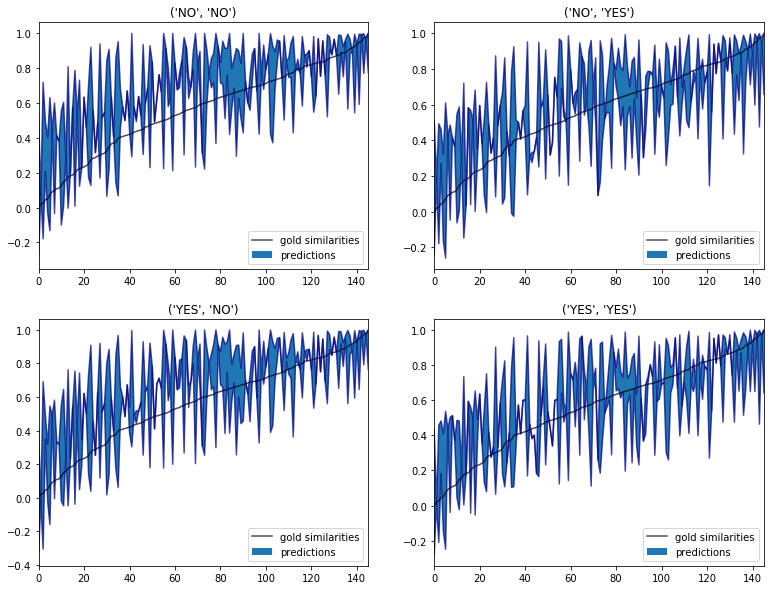

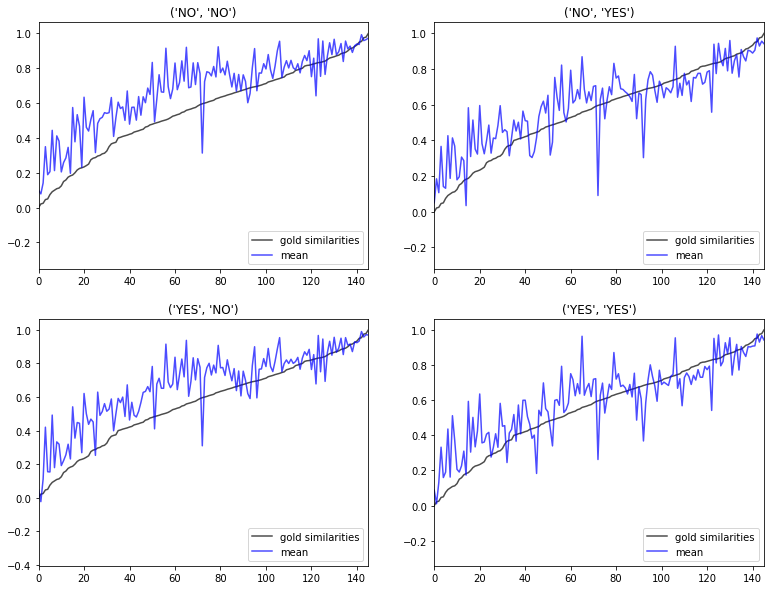

In [135]:

figsize = (13, 10)
images_2 = {}
#ax = plt.figure(figsize=figsize)
#plot = sims_predicted_grouped[['sims_gold', ("('NO', 'NO')", 'max_dif')]].plot(use_index=False, alpha=0.7, figsize=figsize)
## all
#plot = sims_predicted_grouped.plot(use_index=False, alpha=0.7, figsize=figsize)
#ax = plt.gca()
#ax.legend(loc="lower right")
#fig_predictions_sep = plot.get_figure()
#images_2['fig_predictions'] = plot.get_figure()

fig_predictions_area, axs = plt.subplots(2,2, figsize=figsize)
#sims_predicted.sort_values(by=["sims_gold"], ascending=True)[["sims_gold", "('NO', 'NO')"]].groupby("sims_gold").plot(use_index=False, alpha=0.7, figsize=figsize, ax=axs[0][0])
for i, s in enumerate(settings):
    x = i / 2
    y = i % 2
    
    ax = sims_predicted_grouped[["sims_gold", s]].plot(use_index=False, alpha=0.7, figsize=figsize, ax=axs[x][y])
    ax.fill_between(ax.lines[0].get_xdata(), ax.lines[1].get_ydata(), ax.lines[2].get_ydata(), label='predictions')
    # configure gold_sims ...
    ax.lines[0].set_color("black")
    ax.lines[0].set_label('gold similarities')
    # ... and min ...
    ax.lines[1].set_label('')
    ax.lines[1].set_color("navy")
    # ... and max ...
    ax.lines[2].set_color("navy")
    ax.lines[2].set_label('')
    # ... and mean ...
    ax.lines[3].set_linestyle('None')
    ax.lines[3].set_label('')
    ax.set_title(s)
    #ax.fill_between(ax.lines[0].get_xdata(), ax.lines[0].get_ydata(), ax.lines[1].get_ydata())
    axs[x][y].legend(loc="lower right")
    
print_images({'fig_predictions_area':fig_predictions_area})

fig_predictions_mean, axs = plt.subplots(2,2, figsize=figsize)
#sims_predicted.sort_values(by=["sims_gold"], ascending=True)[["sims_gold", "('NO', 'NO')"]].groupby("sims_gold").plot(use_index=False, alpha=0.7, figsize=figsize, ax=axs[0][0])
for i, s in enumerate(settings):
    x = i / 2
    y = i % 2
    
    ax = sims_predicted_grouped[["sims_gold", s]].plot(use_index=False, alpha=0.7, figsize=figsize, ax=axs[x][y])
    #ax.fill_between(ax.lines[0].get_xdata(), ax.lines[1].get_ydata(), ax.lines[2].get_ydata(), label='predictions')
    # configure gold_sims ...
    ax.lines[0].set_color("black")
    ax.lines[0].set_label('gold similarities')
    # ... and min ...
    ax.lines[1].set_linestyle('None')
    ax.lines[1].set_label('')
    #ax.lines[1].set_color("navy")
    # ... and max ...
    ax.lines[2].set_linestyle('None')
    ax.lines[2].set_label('')
    #ax.lines[2].set_color("navy")
    # ... and mean ...
    #ax.lines[3].set_linestyle('None')
    ax.lines[3].set_color("blue")
    ax.lines[3].set_label('mean')
    ax.set_title(s)
    #ax.fill_between(ax.lines[0].get_xdata(), ax.lines[0].get_ydata(), ax.lines[1].get_ydata())
    axs[x][y].legend(loc="lower right")

print_images({'fig_predictions_mean':fig_predictions_mean})

In [ ]:
largest_pairs_grouped_neg = {}
largest_pairs_grouped_pos = {}
for s in settings:
    l = list(sims_errors_grouped.sort_values(by="error "+s, ascending=True)['indices'][:10])
    largest_pairs_grouped_neg[s]=sorted([item for sublist in l for item in sublist])
    l = list(sims_errors_grouped.sort_values(by="error "+s, ascending=False)['indices'][:10])
    largest_pairs_grouped_pos[s]=sorted([item for sublist in l for item in sublist])
#pd.DataFrame(largest_pairs_grouped_neg)
pd.DataFrame(largest_pairs_grouped_pos)

In [ ]:
errors_top100 = {}
errors_top10 = {}
errors = pd.DataFrame(errors_)
errors['sentence_A'] = sick_test['sentence_A']
errors['sentence_B'] = sick_test['sentence_B']
errors['score_gold'] = sick_test['relatedness_score'].sub(1.).div(4.)
errors_dif = {}
for i, s1 in enumerate(settings):
    #all_sorted = errors.sort_values(by=[s1], ascending=False)
    errors_top100[s1] = all_sorted[:100]
    errors_top10[s1] = all_sorted[:10]
    for s2 in settings[i+1:]:
        errors_dif[s1,s2] = errors[s2]-errors[s1]
        errors['%s vs %s' % (str(s1),str(s2))] = errors_dif[s1,s2]

#errors_top100[('NO', 'YES')]['score_gold'].mean()
#errors_top10[('NO', 'YES')]#[('NO', 'YES'), 'sentence_A', 'sentence_B', 'score_gold']
#errors_dif.keys() # (('NO', 'YES'), ('YES', 'YES')) #('NO', 'NO') vs ('NO', 'YES')
#errors_dif[(('NO', 'YES'), ('YES', 'YES'))]

# order aware rocks (dep edge off) 
#errors.sort_values(by=["('NO', 'NO') vs ('NO', 'YES')"], ascending=True)[:10]

# order aware fails (dep edge off) 
#errors.sort_values(by=["('NO', 'NO') vs ('NO', 'YES')"], ascending=False)[:10]

# order aware rocks (dep edge on) 
#errors.sort_values(by=["('YES', 'NO') vs ('YES', 'YES')"], ascending=True)[:10]

# order aware fails (dep edge on) 
#errors.sort_values(by=["('YES', 'NO') vs ('YES', 'YES')"], ascending=False)[:10]


# dep edge rocks (order aware off) 
#errors.sort_values(by=["('NO', 'NO') vs ('YES', 'NO')"], ascending=True)[:10]

# dep edge fails (order aware off) 
#errors.sort_values(by=["('NO', 'NO') vs ('YES', 'NO')"], ascending=False)[:10]

# dep edge rocks (order aware on) 
#errors.sort_values(by=["('NO', 'YES') vs ('YES', 'YES')"], ascending=True)[:10]

# dep edge fails (order aware on) 
#errors.sort_values(by=["('NO', 'YES') vs ('YES', 'YES')"], ascending=False)[:10]

# just 
errors.sort_values(by="('NO', 'NO')", ascending=True)[:10]


In [ ]:
for s in settings:
    print('%-14s %.4f   %.4f' % (str(s), errors_top10[s]['score_gold'].mean(), errors_top100[s]['score_gold'].std()))
    #print(errors_top100[s]['score_gold'].std())

In [ ]:
# biggest deviations (negative)
errors.iloc[[2389, 2539, 732, 1569]]